# Reading Dataset and Filter Warnings

In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/admin/Downloads/training_set.csv")
B=pd.read_csv("C:/Users/admin/Downloads/testing_set.csv")
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Missing Data Treatment

In [3]:
#A.isna().sum()

In [4]:
A.Alley = A.Alley.fillna("No alley access")
A.BsmtQual = A.BsmtQual.fillna("No Basement")
A.BsmtCond = A.BsmtCond.fillna("No Basement")
A.BsmtExposure = A.BsmtExposure.fillna("No Basement")
A.BsmtFinType1 = A.BsmtFinType1.fillna("No Basement")
A.BsmtFinType2 = A.BsmtFinType2.fillna("No Basement")
A.FireplaceQu = A.FireplaceQu.fillna("No Fireplace")
A.GarageType = A.GarageType.fillna("No Garage")
A.GarageFinish = A.GarageFinish.fillna("No Garage")
A.GarageQual = A.GarageQual.fillna("No Garage")
A.GarageCond = A.GarageCond.fillna("No Garage")
A.PoolQC = A.PoolQC.fillna("No Pool")
A.Fence = A.Fence.fillna("No Fence")
A.MiscFeature = A.MiscFeature.fillna("None")

B.Alley = B.Alley.fillna("No alley access")
B.BsmtQual = B.BsmtQual.fillna("No Basement")
B.BsmtCond = B.BsmtCond.fillna("No Basement")
B.BsmtExposure = B.BsmtExposure.fillna("No Basement")
B.BsmtFinType1 = B.BsmtFinType1.fillna("No Basement")
B.BsmtFinType2 = B.BsmtFinType2.fillna("No Basement")
B.FireplaceQu = B.FireplaceQu.fillna("No Fireplace")
B.GarageType = B.GarageType.fillna("No Garage")
B.GarageFinish = B.GarageFinish.fillna("No Garage")
B.GarageQual = B.GarageQual.fillna("No Garage")
B.GarageCond = B.GarageCond.fillna("No Garage")
B.PoolQC = B.PoolQC.fillna("No Pool")
B.Fence = B.Fence.fillna("No Fence")
B.MiscFeature = B.MiscFeature.fillna("None")

In [5]:
from functions import replacer
replacer(A)
replacer(B)

# Exploratory Data Analysis

In [6]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [7]:
A.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

# Define X and Y

In [8]:
#A.isna().sum()

In [9]:
X = A.drop(labels=["Id","SalePrice"],axis=1)
Y = A[["SalePrice"]]

In [10]:
#X.isna().sum()

# Removing Outliers

In [11]:
from functions import standardize,outliers
X1 = standardize(X)
OL = outliers(X1)

In [12]:
#X1.isna().sum()

In [13]:
X = X.drop(index=OL,axis=0)
Y = Y.drop(index=OL,axis=0)

In [14]:
X.shape

(1021, 79)

In [15]:
X.index = range(0,1021,1)
Y.index = range(0,1021,1)

# Preprocessing

In [16]:
from functions import preprocessing
Xnew = preprocessing(X)

In [17]:
Xnew.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 273, dtype: int64

# Training testing split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Creating a Backward elemination OLS model

In [19]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ol = OLS(ytrain,xconst)
model = ol.fit()
rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().index[-1]
print("Dropped: column:",col_to_drop,"\tRsquared:",round(rsq,4))
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
xconst = add_constant(xtrain)
ol = OLS(ytrain,xconst)
model = ol.fit()
rsq = model.rsquared_adj

Dropped: column: BldgType_Twnhs 	Rsquared: 0.9341


In [20]:
for i in range(0,10):
    from statsmodels.api import OLS,add_constant
    xconst = add_constant(xtrain)
    ol = OLS(ytrain,xconst)
    model = ol.fit()
    rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    print("Dropped: column:",col_to_drop,"\tRsquared:",round(rsq,4))
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
    xconst = add_constant(xtrain)
    ol = OLS(ytrain,xconst)
    model = ol.fit()
    rsq = model.rsquared_adj

Dropped: column: Neighborhood_Veenker 	Rsquared: 0.9341
Dropped: column: HalfBath 	Rsquared: 0.9341
Dropped: column: Neighborhood_SawyerW 	Rsquared: 0.9342
Dropped: column: Fence_GdPrv 	Rsquared: 0.9343
Dropped: column: ExterQual_Fa 	Rsquared: 0.9343
Dropped: column: BsmtFinType1_ALQ 	Rsquared: 0.9343
Dropped: column: Neighborhood_Blueste 	Rsquared: 0.9343
Dropped: column: MasVnrArea 	Rsquared: 0.9343
Dropped: column: Functional_Maj2 	Rsquared: 0.9344
Dropped: column: Functional_Maj1 	Rsquared: 0.9344


# Creating a Linear model based on selected features

In [21]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err=mean_squared_error(ytrain,tr_pred)
ts_err=mean_squared_error(ytest,ts_pred)

In [22]:
tr_err

226602167.55514705

In [23]:
ts_err

1.9418816664570636e+28

In [24]:
#Xnew.corr()

# Regularization

In [25]:
lambdas = []
q = 8
for i in range(0,4000,1):
    q = q + 0.001
    q = round(q,4)
    lambdas.append(q)

In [26]:
from sklearn.linear_model import Ridge
tr = []
ts = []
for i in lambdas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)


In [27]:
t = range(0,4000,1)

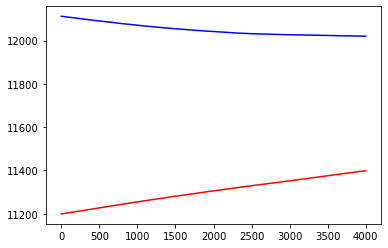

In [28]:
import matplotlib.pyplot as plt
plt.plot(t,tr,c="red")
plt.plot(t,ts,c="blue")

In [29]:
lambdas[-1]

12.0

In [30]:
tr_err

11398.992102519509

In [31]:
ts_err

12020.423413403396

In [32]:
rr=Ridge(alpha=12.0)
model=rr.fit(xtrain,ytrain)

In [33]:
xtrain.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)

# Creating test data ready for predictions

In [34]:
xtest = B.drop(labels=["Id"],axis=1)
xtest_new = preprocessing(xtest)

In [37]:
#test_new[list(xtrain.columns)]

In [45]:
xtest_new['Exterior2nd_Other']=0
xtest_new['Exterior2nd_Other']=0
xtest_new['Condition2_RRNn']=0
xtest_new['Exterior1st_ImStucc']=0
xtest_new['Heating_Floor']=0
xtest_new['GarageQual_Ex']=0

In [52]:
final_data_for_pred = xtest_new[list(xtrain.columns)]

# predict and save to file

In [53]:
pred = model.predict(final_data_for_pred)

In [56]:
C = B[["Id"]]

In [57]:
C['SalePrice']=pred

In [58]:
C.to_csv("Desktop/submissions.csv")